In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../../../Data/wine_data.csv",usecols=[0,1,2],names=['Class label', 'Alcohol', 'Malic acid'])
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 2) (36, 2) (142,) (36,)


In [18]:
X_train

,Alcohol,Malic acid
143,13.62,4.95
175,13.27,4.28
56,14.22,1.70
164,13.78,2.76
119,12.00,3.43
...,...,...
109,11.61,1.35
157,12.45,3.03
42,13.88,1.89
43,13.24,3.98


In [19]:
y_train

143    3
175    3
56     1
164    3
119    2
      ..
109    2
157    3
42     1
43     1
105    2
Name: Class label, Length: 142, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

# Using Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.75

In [22]:
lr = LogisticRegression()
lr.fit(X_train_sca,y_train)
y_pred = lr.predict(X_test_sca)
accuracy_score(y_test,y_pred)

0.75

# Scatter plot Comparison

Text(0.5, 1.0, 'After normalization')

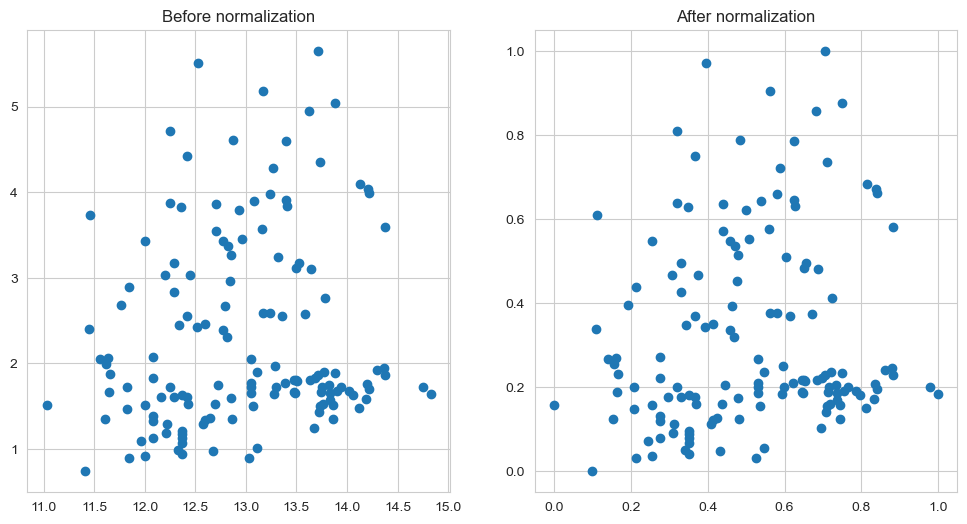

In [28]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axis[0].scatter(X_train['Alcohol'],X_train['Malic acid'])
axis[0].set_title("Before normalization")

axis[1].scatter(X_train_sca[:,0],X_train_sca[:,1])
axis[1].set_title("After normalization")

# Distribution Comparison

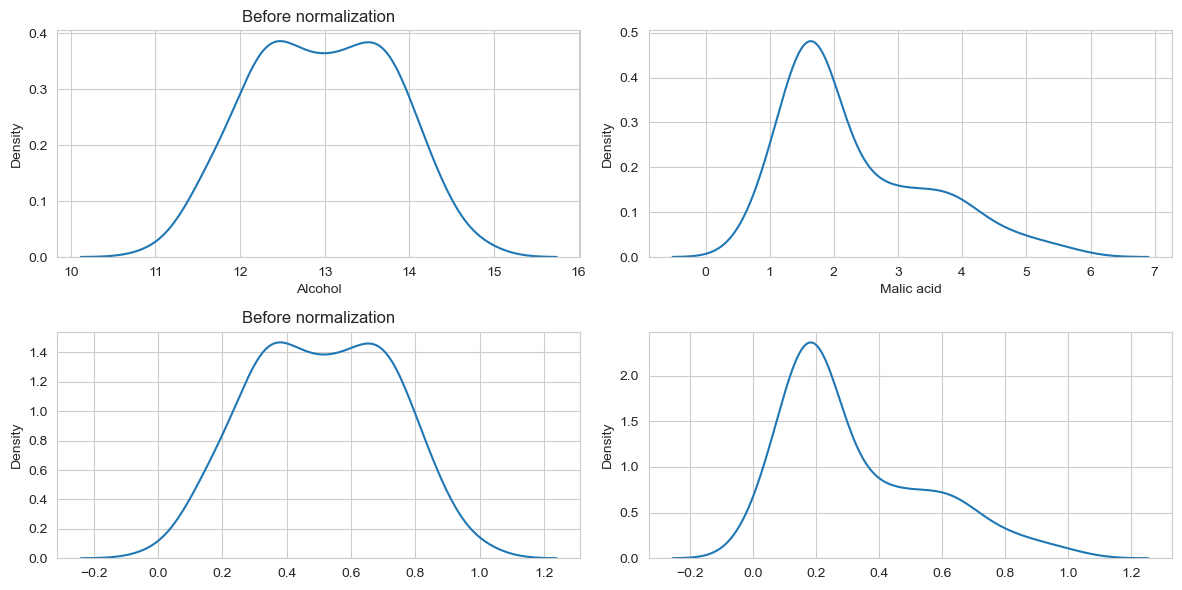

In [30]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
sns.kdeplot(data=X_train['Alcohol'], ax=axis[0][0])
sns.kdeplot(data=X_train['Malic acid'], ax=axis[0][1])
axis[0][0].set_title("Before normalization")


sns.kdeplot(data=X_train_sca[:,0], ax=axis[1][0])
sns.kdeplot(data=X_train_sca[:,1], ax=axis[1][1])
axis[1][0].set_title("Before normalization")

plt.tight_layout()